In [2532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [2533]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [2534]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [2535]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752934 entries, 0 to 1752933
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 26.7 MB


In [2536]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1752929    0.20
1752930    0.20
1752931    0.15
1752932    0.14
1752933    0.13
Name: kWh, Length: 1752934, dtype: float64

In [2537]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1752929    0.20
1752930    0.20
1752931    0.15
1752932    0.14
1752933    0.13
Name: kWh, Length: 1752934, dtype: float64

In [2538]:
l=len(conso_data)-1
l

1752933

In [2539]:
conso_data['sec']=conso_data['Interval']/1000


In [2540]:
conso_data['Wh']=3600000/conso_data['Interval']


In [2541]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [2542]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752934 entries, 0 to 1752933
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 66.9 MB


In [2543]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1752929,18333,0.20,18.333,196.367207,43166333861
1752930,18022,0.20,18.022,199.755854,43166351883
1752931,23758,0.15,23.758,151.527906,43166375641
1752932,26444,0.14,26.444,136.136742,43166402085
1752933,26972,0.13,26.972,133.471748,43166429057


In [2544]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

43166429057000

In [2545]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 17, 28, 692257)

In [2546]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [2547]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [2548]:
base

datetime.datetime(2023, 8, 21, 20, 17, 28, 692257)

In [2549]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 20:17:50.626257
1         2023-08-21 20:18:12.484257
2         2023-08-21 20:18:34.485257
3         2023-08-21 20:18:56.413257
4         2023-08-21 20:19:18.304257
                     ...            
1752929   2025-01-02 10:56:22.553257
1752930   2025-01-02 10:56:40.575257
1752931   2025-01-02 10:57:04.333257
1752932   2025-01-02 10:57:30.777257
1752933   2025-01-02 10:57:57.749257
Name: dates, Length: 1752934, dtype: datetime64[ns]

## créer les dates

In [2550]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:17:50.626257,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:18:12.484257,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:18:34.485257,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:18:56.413257,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:19:18.304257,21/08/23
...,...,...,...,...,...,...,...
1752929,18333,0.20,18.333,196.367207,43166333861,2025-01-02 10:56:22.553257,02/01/25
1752930,18022,0.20,18.022,199.755854,43166351883,2025-01-02 10:56:40.575257,02/01/25
1752931,23758,0.15,23.758,151.527906,43166375641,2025-01-02 10:57:04.333257,02/01/25
1752932,26444,0.14,26.444,136.136742,43166402085,2025-01-02 10:57:30.777257,02/01/25


### save conso_data with dates

In [2551]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [2552]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('02/01/25', 2, 1, 2025)

In [2553]:
here = now.strftime('%H:%M:%S')
here

'10:59:09'

In [2554]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [2555]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 1751610 to 1752933
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1324 non-null   int64         
 1   kWh        1324 non-null   float64       
 2   sec        1324 non-null   float64       
 3   Wh         1324 non-null   float64       
 4   cumul(ms)  1324 non-null   int64         
 5   dates      1324 non-null   datetime64[ns]
 6   days       1324 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 82.8+ KB


In [2556]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [2557]:
data = list(df_grp['kWh'])
print(data)

[0.681, 3.701, 4.222, 3.687, 4.027, 4.631, 3.635, 3.444, 3.506, 3.699, 3.589, 3.972, 4.259, 3.639, 3.626, 3.64, 3.321, 3.374, 4.144, 4.028, 4.014, 4.057, 3.479, 4.338, 3.857, 3.753, 4.178, 4.711, 3.976, 3.218, 3.17, 3.896, 3.778, 3.111, 3.784, 4.161, 3.669, 3.675, 4.666, 4.274, 4.466, 3.822, 3.446, 4.299, 3.875, 3.828, 3.48, 4.035, 3.694, 3.41, 4.158, 3.375, 3.855, 3.859, 3.629, 3.751, 4.278, 3.274, 3.882, 3.073, 2.056, 2.041, 2.378, 4.074, 3.676, 4.35, 3.589, 3.961, 3.756, 3.794, 4.119, 4.059, 3.709, 3.128, 3.765, 3.569, 3.566, 3.712, 3.675, 3.316, 3.835, 3.252, 3.754, 3.607, 4.073, 3.61, 3.43, 3.721, 4.112, 4.335, 3.934, 4.147, 4.28, 3.779, 3.925, 3.821, 3.92, 3.704, 4.041, 4.398, 3.885, 3.508, 3.676, 3.674, 3.347, 3.843, 3.963, 4.135, 3.513, 4.159, 3.595, 3.956, 4.64, 3.63, 3.515, 3.551, 4.046, 3.827, 4.084, 3.972, 3.745, 3.598, 5.101, 3.745, 3.758, 4.226, 4.152, 4.536, 4.426, 4.13, 3.67, 4.377, 4.749, 4.124, 4.778, 4.397, 3.687, 4.101, 3.826, 3.695, 3.484, 3.957, 3.686, 3.706, 3.65

In [2558]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [2559]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [2560]:
df = conso_data
len(df)

1752934

In [2561]:
period(p=2)

2023-08-22 02:24:04.429257	2023-08-22 09:28:20.049257	7h 4m 15s 	2000


In [2562]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.296521
dtype: float64

In [2563]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.49887
dtype: float64

In [2564]:
last=df_grp.iloc[-1]['kWh']
last

1.324

In [2565]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 1751610 to 1752933
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1324 non-null   int64         
 1   kWh        1324 non-null   float64       
 2   sec        1324 non-null   float64       
 3   Wh         1324 non-null   float64       
 4   cumul(ms)  1324 non-null   int64         
 5   dates      1324 non-null   datetime64[ns]
 6   days       1324 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 82.8+ KB


In [2566]:
# select day
day = today
#day = '16/08/24'


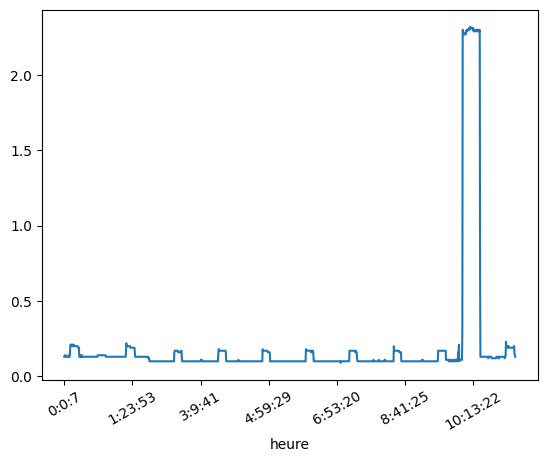

In [2567]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [2568]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:17:50.626257,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:18:12.484257,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:18:34.485257,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:18:56.413257,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:19:18.304257,21/08/23
...,...,...,...,...,...,...,...
1752929,18333,0.20,18.333,196.367207,43166333861,2025-01-02 10:56:22.553257,02/01/25
1752930,18022,0.20,18.022,199.755854,43166351883,2025-01-02 10:56:40.575257,02/01/25
1752931,23758,0.15,23.758,151.527906,43166375641,2025-01-02 10:57:04.333257,02/01/25
1752932,26444,0.14,26.444,136.136742,43166402085,2025-01-02 10:57:30.777257,02/01/25


In [2569]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:7,28356,0.13,28.356,126.957258,43126958408,2025-01-02 00:00:07.100257,02/01/25
0:0:35,28373,0.13,28.373,126.881190,43126986781,2025-01-02 00:00:35.473257,02/01/25
0:1:1,25591,0.14,25.591,140.674456,43127012372,2025-01-02 00:01:01.064257,02/01/25
0:1:27,26144,0.14,26.144,137.698898,43127038516,2025-01-02 00:01:27.208257,02/01/25
0:1:53,26501,0.14,26.501,135.843930,43127065017,2025-01-02 00:01:53.709257,02/01/25
...,...,...,...,...,...,...,...
10:56:22,18333,0.20,18.333,196.367207,43166333861,2025-01-02 10:56:22.553257,02/01/25
10:56:40,18022,0.20,18.022,199.755854,43166351883,2025-01-02 10:56:40.575257,02/01/25
10:57:4,23758,0.15,23.758,151.527906,43166375641,2025-01-02 10:57:04.333257,02/01/25


In [2570]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 23/12/24 5.078
Min : 21/12/24 3.003


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1751610,28356,0.13,28.356,126.957258,43126958408,2025-01-02 00:00:07.100257,02/01/25,0:0:7
1751611,28373,0.13,28.373,126.881190,43126986781,2025-01-02 00:00:35.473257,02/01/25,0:0:35
1751612,25591,0.14,25.591,140.674456,43127012372,2025-01-02 00:01:01.064257,02/01/25,0:1:1
1751613,26144,0.14,26.144,137.698898,43127038516,2025-01-02 00:01:27.208257,02/01/25,0:1:27
1751614,26501,0.14,26.501,135.843930,43127065017,2025-01-02 00:01:53.709257,02/01/25,0:1:53
...,...,...,...,...,...,...,...,...
1752929,18333,0.20,18.333,196.367207,43166333861,2025-01-02 10:56:22.553257,02/01/25,10:56:22
1752930,18022,0.20,18.022,199.755854,43166351883,2025-01-02 10:56:40.575257,02/01/25,10:56:40
1752931,23758,0.15,23.758,151.527906,43166375641,2025-01-02 10:57:04.333257,02/01/25,10:57:4
1752932,26444,0.14,26.444,136.136742,43166402085,2025-01-02 10:57:30.777257,02/01/25,10:57:30


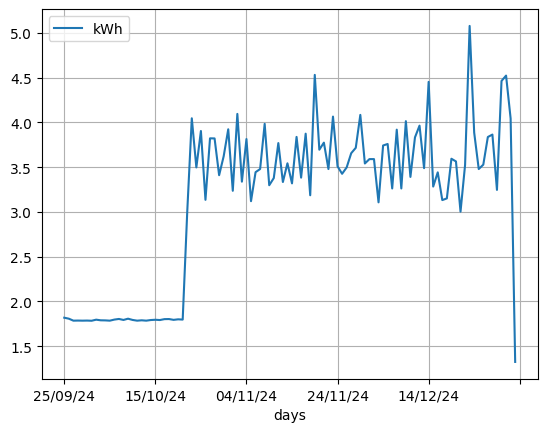

In [2571]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2025-01-02 00:00:07.100257	2025-01-02 08:40:50.644257	8h 40m 43s 	1000
2025-01-02 08:40:50.644257	2025-01-02 10:57:57.749257	2h 17m 7s 	324
<class 'pandas.core.frame.DataFrame'>
Index: 1324 entries, 1751610 to 1752933
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1324 non-null   int64         
 1   kWh        1324 non-null   float64       
 2   sec        1324 non-null   float64       
 3   Wh         1324 non-null   float64       
 4   cumul(ms)  1324 non-null   int64         
 5   dates      1324 non-null   datetime64[ns]
 6   days       1324 non-null   object        
 7   heure      1324 non-null   object        
 8   hours      1324 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 103.4+ KB


('02/01/25', <Axes: xlabel='hours'>)

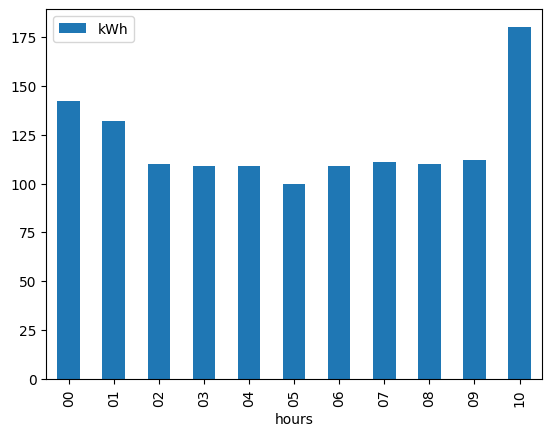

In [2572]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [2573]:
df_grp

,kWh
days,
21/08/23,0.681
22/08/23,3.701
23/08/23,4.222
24/08/23,3.687
25/08/23,4.027
...,...
29/12/24,3.246
30/12/24,4.463
31/12/24,4.523


In [2574]:
# select number of days to display
span = 30
#df_grp.tail(span)


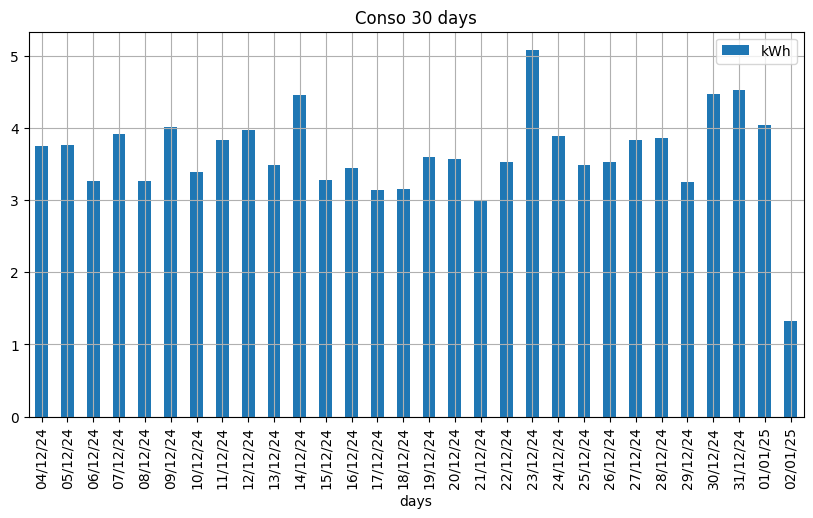

In [2575]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


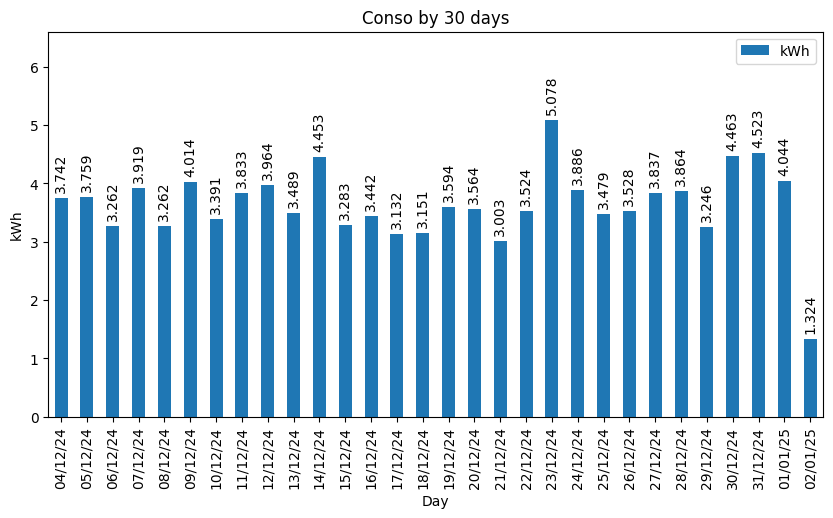

In [2576]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [2577]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
04/12/24    3.742
05/12/24    3.759
06/12/24    3.262
07/12/24    3.919
08/12/24    3.262
09/12/24    4.014
10/12/24    3.391
11/12/24    3.833
12/12/24    3.964
13/12/24    3.489
14/12/24    4.453
15/12/24    3.283
16/12/24    3.442
17/12/24    3.132
18/12/24    3.151
19/12/24    3.594
20/12/24    3.564
21/12/24    3.003
22/12/24    3.524
23/12/24    5.078
24/12/24    3.886
25/12/24    3.479
26/12/24    3.528
27/12/24    3.837
28/12/24    3.864
29/12/24    3.246
30/12/24    4.463
31/12/24    4.523
01/01/25    4.044
02/01/25    1.324
Name: kWh, dtype: float64

In [2578]:
x_labels=df_grp.tail(span).index
x_labels

Index(['04/12/24', '05/12/24', '06/12/24', '07/12/24', '08/12/24', '09/12/24',
       '10/12/24', '11/12/24', '12/12/24', '13/12/24', '14/12/24', '15/12/24',
       '16/12/24', '17/12/24', '18/12/24', '19/12/24', '20/12/24', '21/12/24',
       '22/12/24', '23/12/24', '24/12/24', '25/12/24', '26/12/24', '27/12/24',
       '28/12/24', '29/12/24', '30/12/24', '31/12/24', '01/01/25', '02/01/25'],
      dtype='object', name='days')

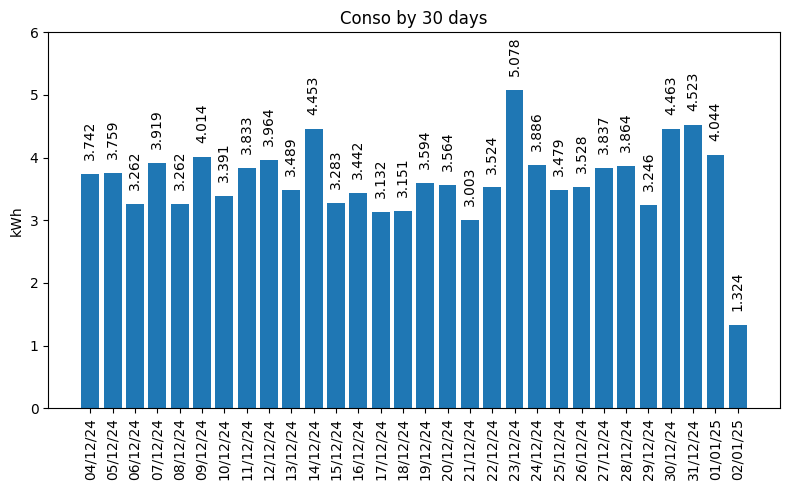

In [2579]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [2580]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

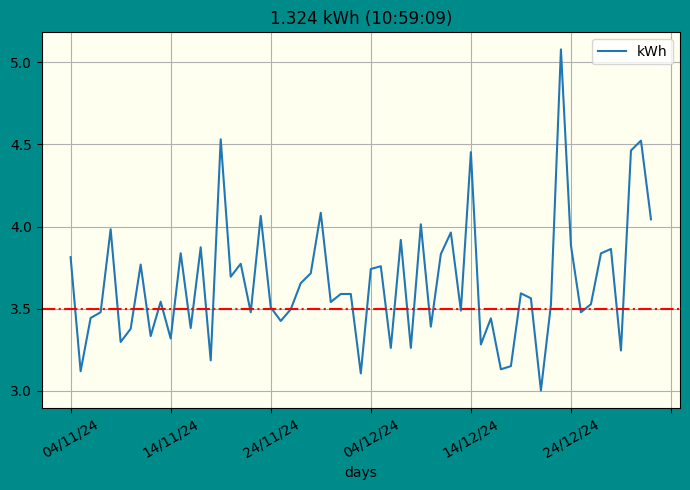

In [2581]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

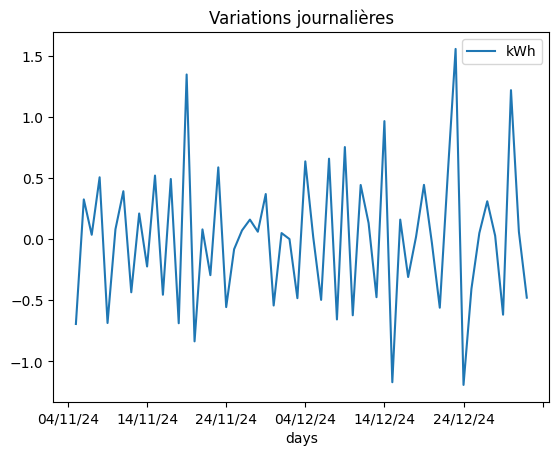

In [2582]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [2583]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:17:50.626257,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:18:12.484257,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:18:34.485257,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:18:56.413257,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:19:18.304257,21/08/23,20
...,...,...,...,...,...,...,...,...
1752929,18333,0.20,18.333,196.367207,43166333861,2025-01-02 10:56:22.553257,02/01/25,10
1752930,18022,0.20,18.022,199.755854,43166351883,2025-01-02 10:56:40.575257,02/01/25,10
1752931,23758,0.15,23.758,151.527906,43166375641,2025-01-02 10:57:04.333257,02/01/25,10
1752932,26444,0.14,26.444,136.136742,43166402085,2025-01-02 10:57:30.777257,02/01/25,10


In [2584]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [2585]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [2586]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [2587]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2588]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,681
22/08/23,3701
23/08/23,4222
24/08/23,3687
25/08/23,4027
...,...
29/12/24,3246
30/12/24,4463
31/12/24,4523


In [2589]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:17:50.626257,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:18:12.484257,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:18:34.485257,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:18:56.413257,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:19:18.304257,21/08/23,20
...,...,...,...,...,...,...,...,...
1752929,18333,0.20,18.333,196.367207,43166333861,2025-01-02 10:56:22.553257,02/01/25,10
1752930,18022,0.20,18.022,199.755854,43166351883,2025-01-02 10:56:40.575257,02/01/25,10
1752931,23758,0.15,23.758,151.527906,43166375641,2025-01-02 10:57:04.333257,02/01/25,10
1752932,26444,0.14,26.444,136.136742,43166402085,2025-01-02 10:57:30.777257,02/01/25,10


In [2590]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 20    0        21/08/23    20  0.16
               1        21/08/23    20  0.16
               2        21/08/23    20  0.16
               3        21/08/23    20  0.16
               4        21/08/23    20  0.16
...                          ...   ...   ...
02/01/25 10    1752929  02/01/25    10  0.20
               1752930  02/01/25    10  0.20
               1752931  02/01/25    10  0.15
               1752932  02/01/25    10  0.14
               1752933  02/01/25    10  0.13

[1752934 rows x 3 columns]

In [2591]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [2592]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/2

In [2593]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,681,681
22/08/23,3701,3701
23/08/23,4222,4222
24/08/23,3687,3687
25/08/23,4027,4027
...,...,...
29/12/24,3246,3246
30/12/24,4463,4463
31/12/24,4523,4523


In [2594]:
grp_by_day['kWh'].cumsum()

days
21/08/23        681
22/08/23       4382
23/08/23       8604
24/08/23      12291
25/08/23      16318
             ...   
29/12/24    1738580
30/12/24    1743043
31/12/24    1747566
01/01/25    1751610
02/01/25    1752934
Name: kWh, Length: 501, dtype: int64

In [2595]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 20     131
         21     279
         22     142
         23     129
22/08/23 00     130
...             ...
02/01/25 06     109
         07     111
         08     110
         09     112
         10     180

[11991 rows x 1 columns]

In [2596]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  20           131
          21           410
          22           552
          23           681
22/08/23  00           811
                    ...   
02/01/25  06       1752421
          07       1752532
          08       1752642
          09       1752754
          10       1752934
Name: kWh, Length: 11991, dtype: int64

In [2597]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 20     131     131    NaN
         21     279     410  148.0
         22     142     552 -137.0
         23     129     681  -13.0
22/08/23 00     130     130    NaN
...             ...     ...    ...
02/01/25 06     109     811    9.0
         07     111     922    2.0
         08     110    1032   -1.0
         09     112    1144    2.0
         10     180    1324   68.0

[11991 rows x 3 columns]

In [2598]:
today, grp_by_dayhours.loc[today]

('02/01/25',
        kWh  cumsum  diff
 hours                   
 00     142     142   NaN
 01     132     274 -10.0
 02     110     384 -22.0
 03     109     493  -1.0
 04     109     602   0.0
 05     100     702  -9.0
 06     109     811   9.0
 07     111     922   2.0
 08     110    1032  -1.0
 09     112    1144   2.0
 10     180    1324  68.0)

Text(0.5, 1.0, 'Cumul journalier')

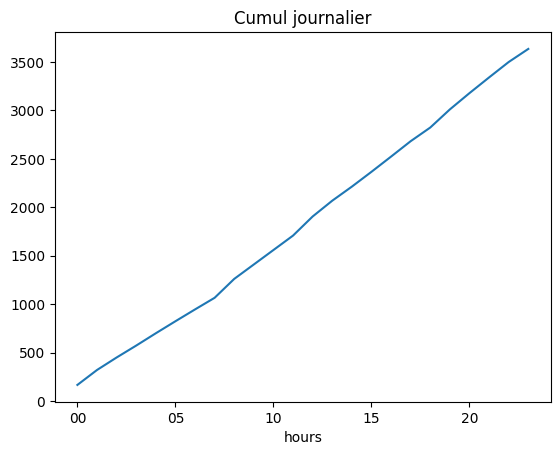

In [2599]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

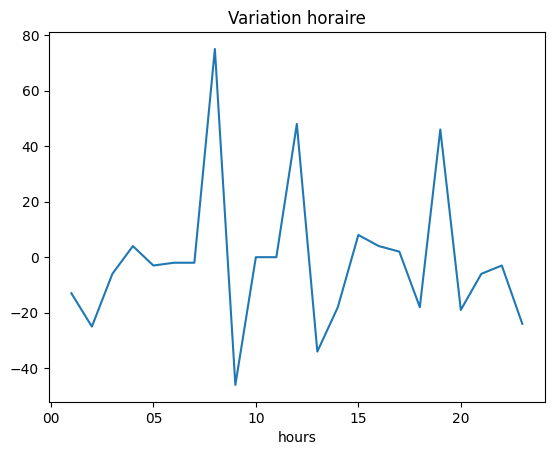

In [2600]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [2601]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

501

In [2602]:
df_grp.tail(n)['kWh'].describe()


count    501.000000
mean       3.498870
std        0.693096
min        0.681000
25%        3.338000
50%        3.622000
75%        3.882000
max        5.101000
Name: kWh, dtype: float64

In [2603]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '501 days')

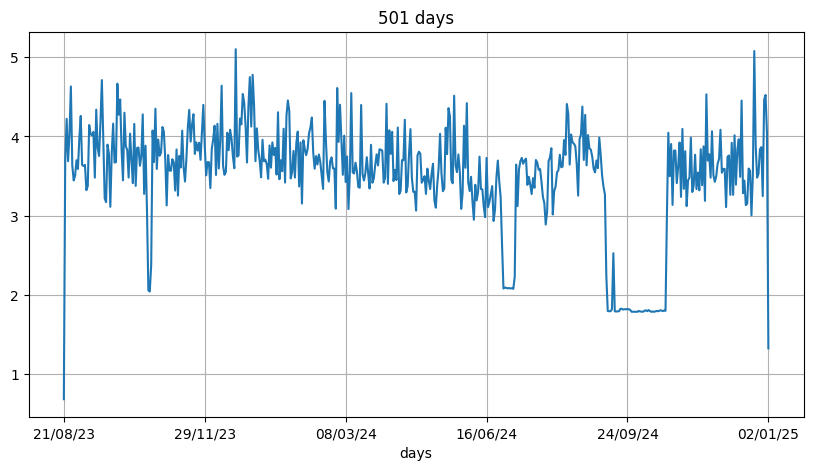

In [2604]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

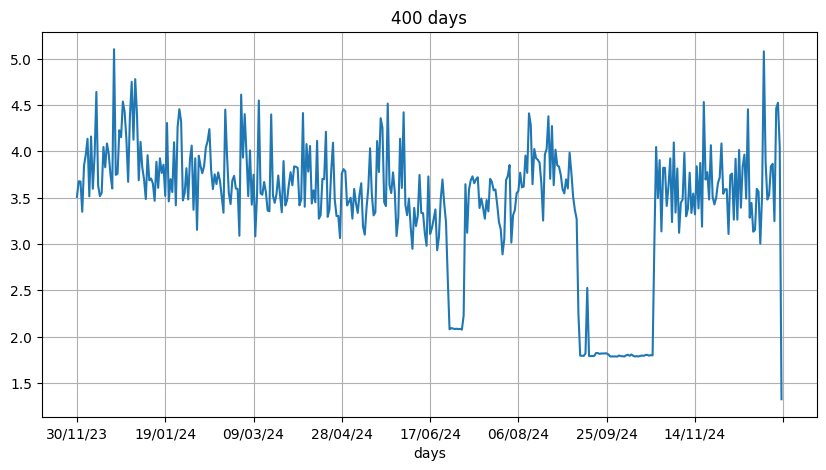

In [2605]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [2606]:
df_grp['kWh']

days
21/08/23    0.681
22/08/23    3.701
23/08/23    4.222
24/08/23    3.687
25/08/23    4.027
            ...  
29/12/24    3.246
30/12/24    4.463
31/12/24    4.523
01/01/25    4.044
02/01/25    1.324
Name: kWh, Length: 501, dtype: float64

In [2607]:
df_grp.describe()

,kWh
count,501.000000
mean,3.498870
std,0.693096
min,0.681000
25%,3.338000
50%,3.622000
75%,3.882000
max,5.101000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

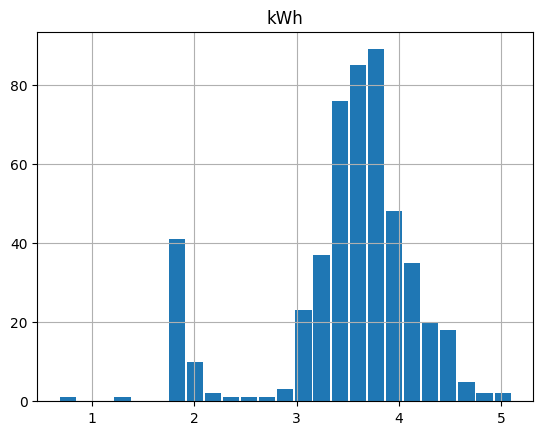

In [2608]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [2609]:
df_grp.tail(span)['kWh']

days
30/11/23    3.508
01/12/23    3.676
02/12/23    3.674
03/12/23    3.347
04/12/23    3.843
            ...  
29/12/24    3.246
30/12/24    4.463
31/12/24    4.523
01/01/25    4.044
02/01/25    1.324
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [2610]:
day

'02/01/25'

In [2611]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,142,142,NaN
01,132,274,-10.0
02,110,384,-22.0
03,109,493,-1.0
04,109,602,0.0
05,100,702,-9.0
06,109,811,9.0
07,111,922,2.0
08,110,1032,-1.0


In [2612]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


11

In [2613]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 12)

In [2614]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [2615]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [2616]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [2617]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [2618]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 00 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     11 non-null     int64  
 1   cumsum  11 non-null     int64  
 2   diff    10 non-null     float64
 3   days    11 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 440.0+ bytes


In [2619]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [2620]:
day

'02/01/25'

In [2621]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,142,142,NaN,1.0
01,132,274,-10.0,2.0
02,110,384,-22.0,3.0
03,109,493,-1.0,4.0
04,109,602,0.0,5.0
05,100,702,-9.0,6.0
06,109,811,9.0,7.0
07,111,922,2.0,8.0
08,110,1032,-1.0,9.0


Text(0.5, 1.0, '02/01/25')

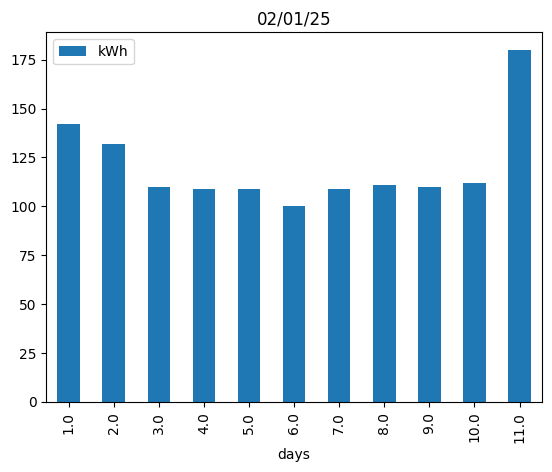

In [2622]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [2623]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object', name='hours')

# Conso du jour


In [2624]:
groupedbyhour.count()

,kWh
hours,
00,142
01,132
02,110
03,109
04,109
05,100
06,109
07,111
08,110


In [2625]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    165
01    166
02    152
03    169
04    157
05    156
06    143
07    114
08    131
09    129
10    116
11    130
12    115
13    131
14    204
15    139
16    157
17    986
18    204
19    278
20    302
21    311
22    321
23    225
Name: kWh, dtype: int64

In [2626]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

312.365

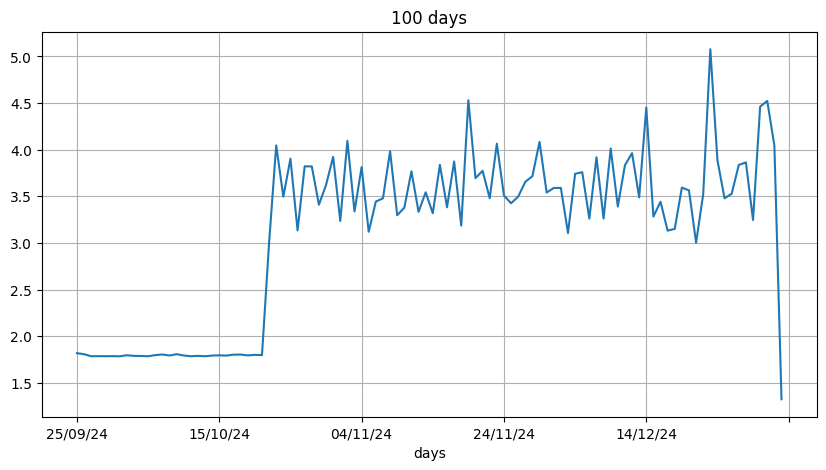

In [2627]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [2628]:
df_grp.tail(1)

,kWh
days,
02/01/25,1.324


In [2629]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.324

In [2630]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

295.08905577659607


# Today

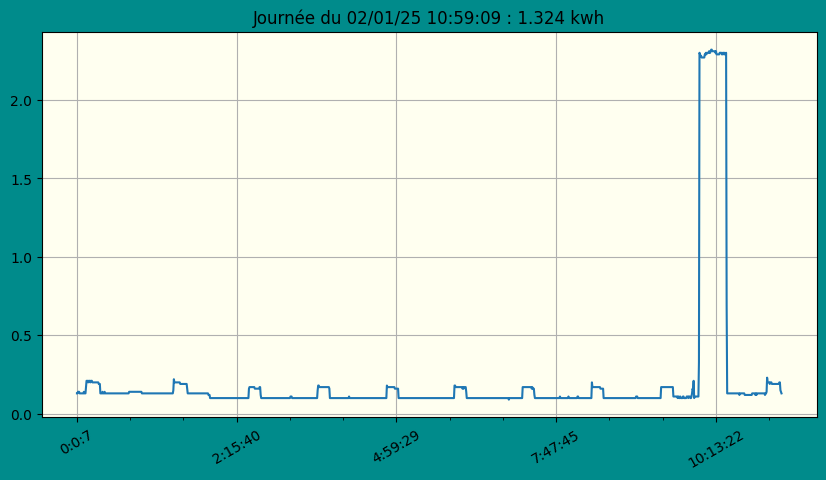

In [2631]:
show(today,bgcolor='ivory')

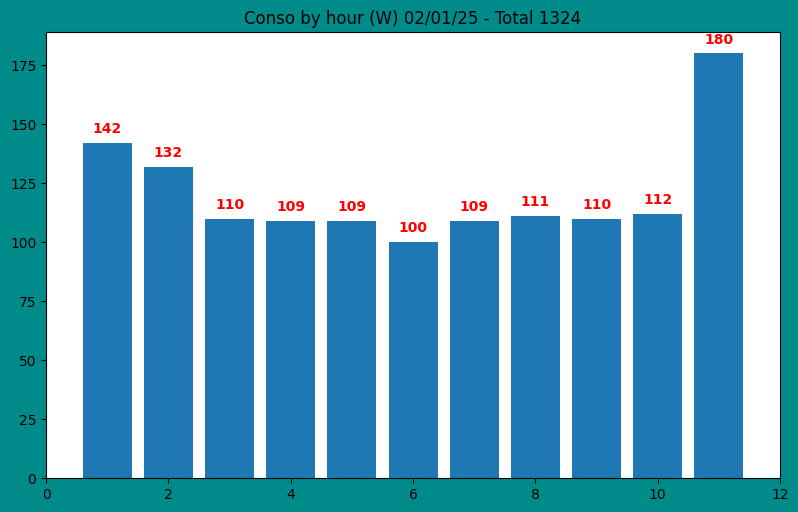

In [2632]:
conso_by_hour(today)

In [2633]:
day = '24/12/24'

('24/12/24', None)

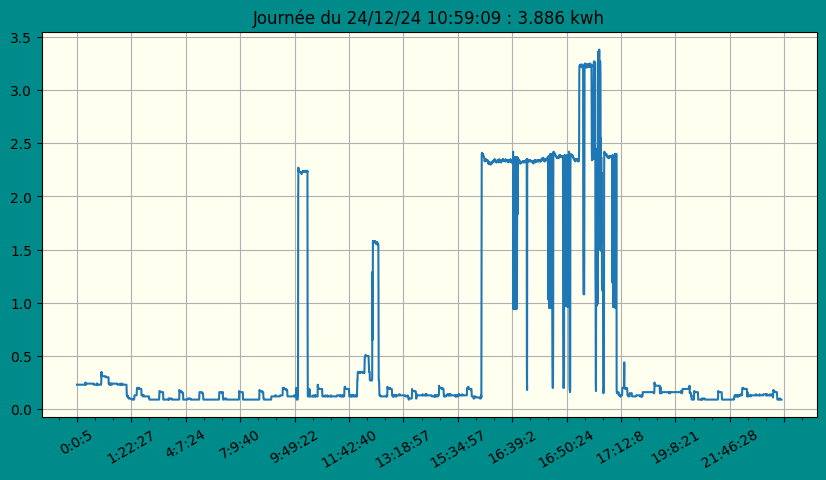

In [2634]:
day, show(day,bgcolor='ivory')

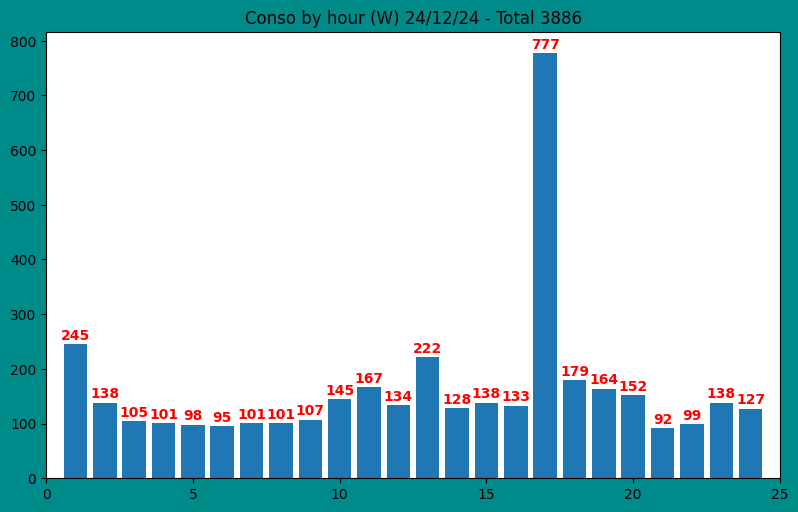

In [2635]:
conso_by_hour(day)

In [2636]:
maxday

'21/12/23'

('21/12/23', None)

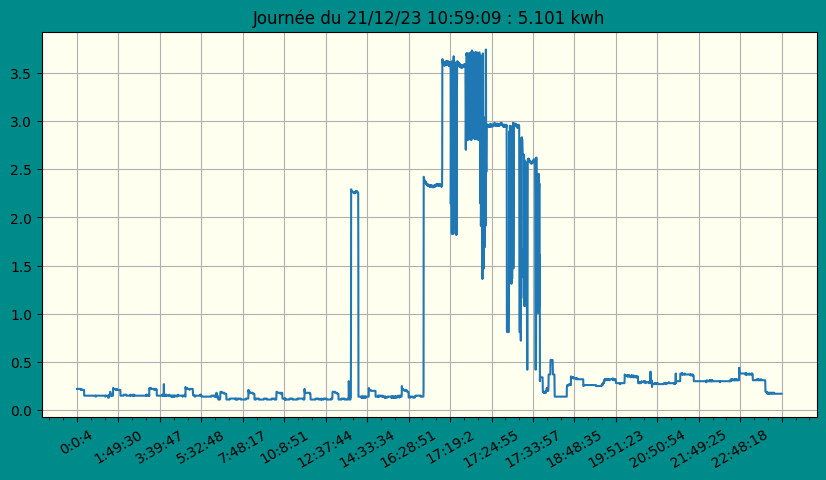

In [2637]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

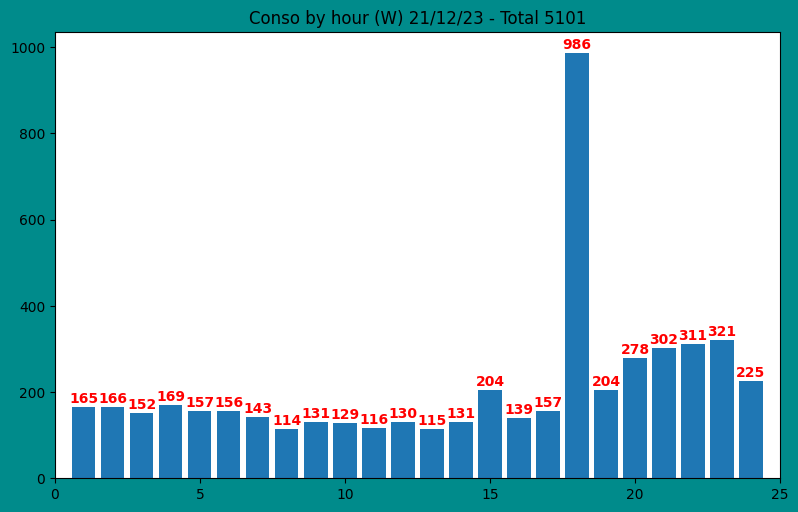

In [2638]:
conso_by_hour(day)

In [2639]:
sum(data)

5101

In [2640]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,142,142,NaN,1.0
01,132,274,-10.0,2.0
02,110,384,-22.0,3.0
03,109,493,-1.0,4.0
04,109,602,0.0,5.0
05,100,702,-9.0,6.0
06,109,811,9.0,7.0
07,111,922,2.0,8.0
08,110,1032,-1.0,9.0


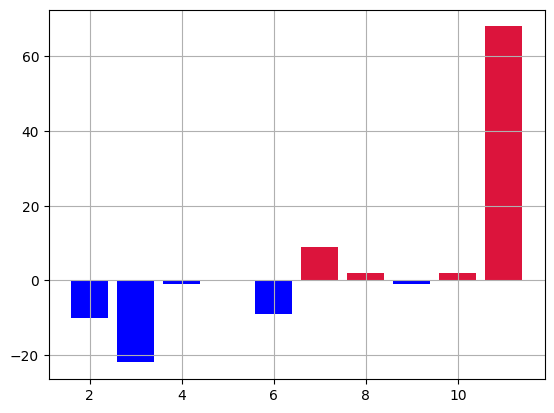

In [2641]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [2642]:
data

hours
00    165
01    166
02    152
03    169
04    157
05    156
06    143
07    114
08    131
09    129
10    116
11    130
12    115
13    131
14    204
15    139
16    157
17    986
18    204
19    278
20    302
21    311
22    321
23    225
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

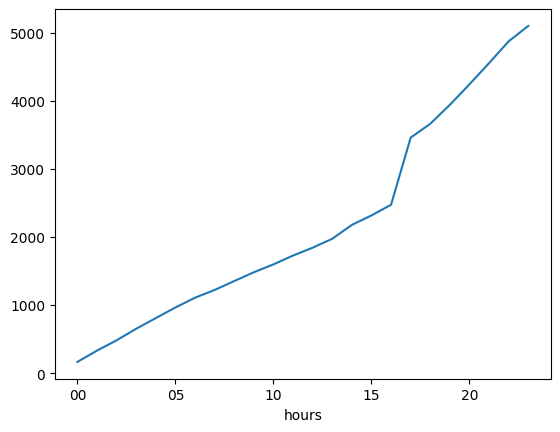

In [2643]:
data.cumsum().plot()


<Axes: xlabel='hours'>

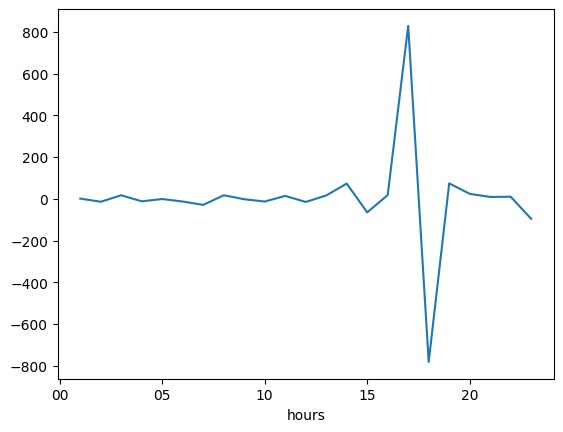

In [2644]:
# evolution par heure
data.diff().plot()

In [2645]:
data.diff().describe()

count     23.000000
mean       2.608696
std      245.571271
min     -782.000000
25%      -13.500000
50%        1.000000
75%       17.000000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

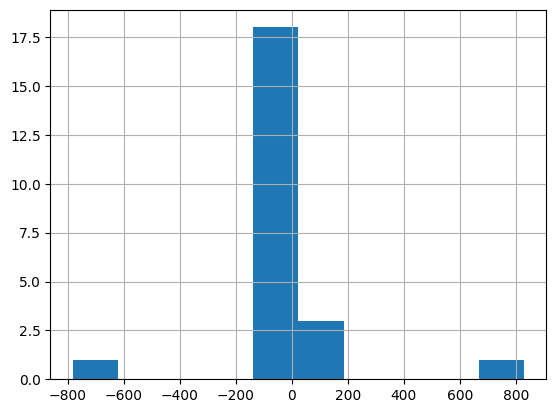

In [2646]:
data.diff().hist()

# Test sauvegarde

In [2647]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '1row.flf',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correla

In [2648]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [2649]:
#conso_byhour(day)

In [2650]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


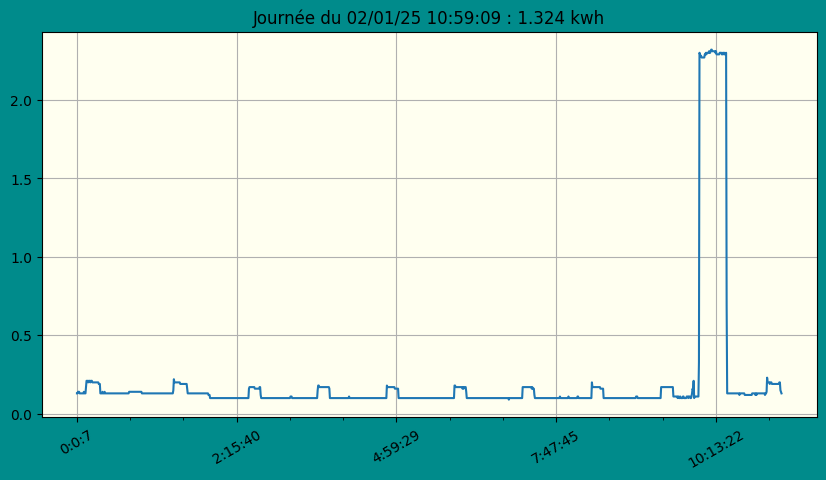

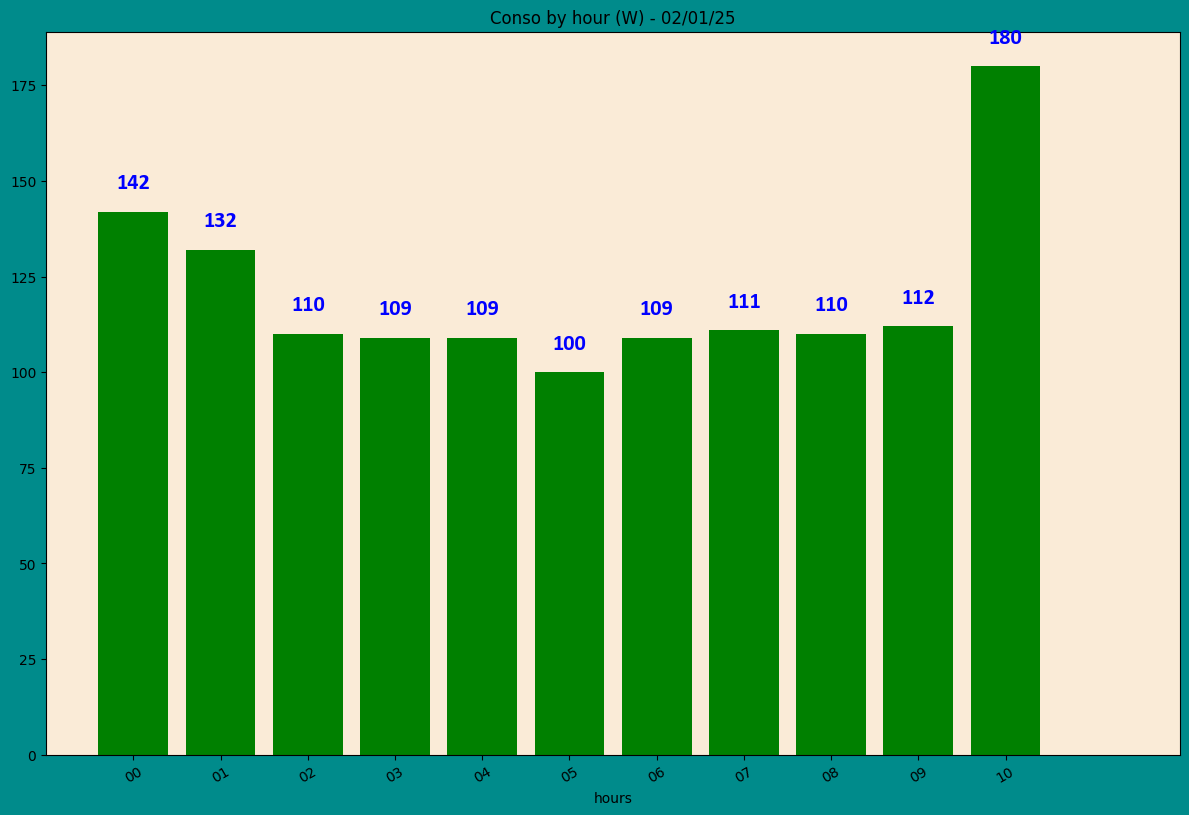

In [2651]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [2652]:
month.describe()


count    30.000000
mean      3.694533
std       0.481848
min       3.003000
25%       3.310000
50%       3.579000
75%       3.910750
max       5.078000
Name: kWh, dtype: float64

<Axes: >

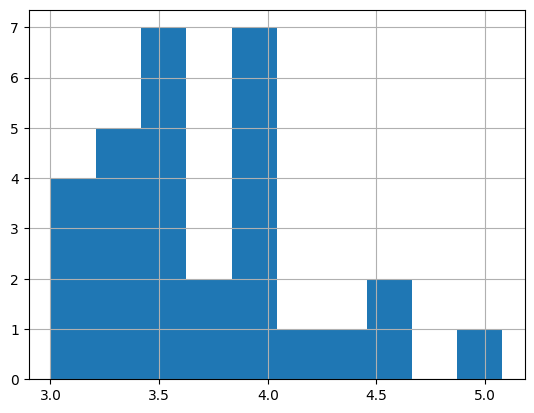

In [2653]:
month.hist()

<Axes: xlabel='days'>

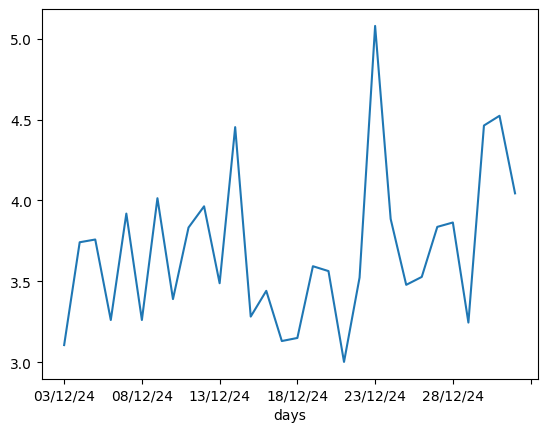

In [2654]:
month.plot()

In [2655]:
# date with max conso in 1 month
month.idxmax()

'23/12/24'

In [2656]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'23/12/24'

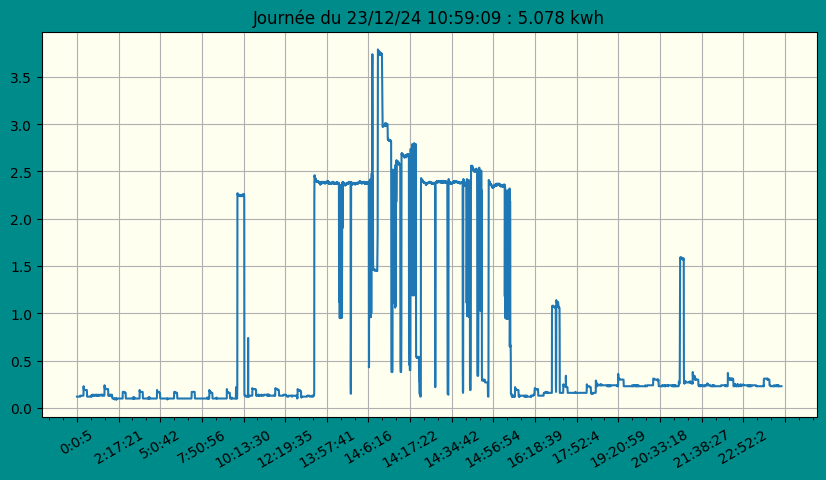

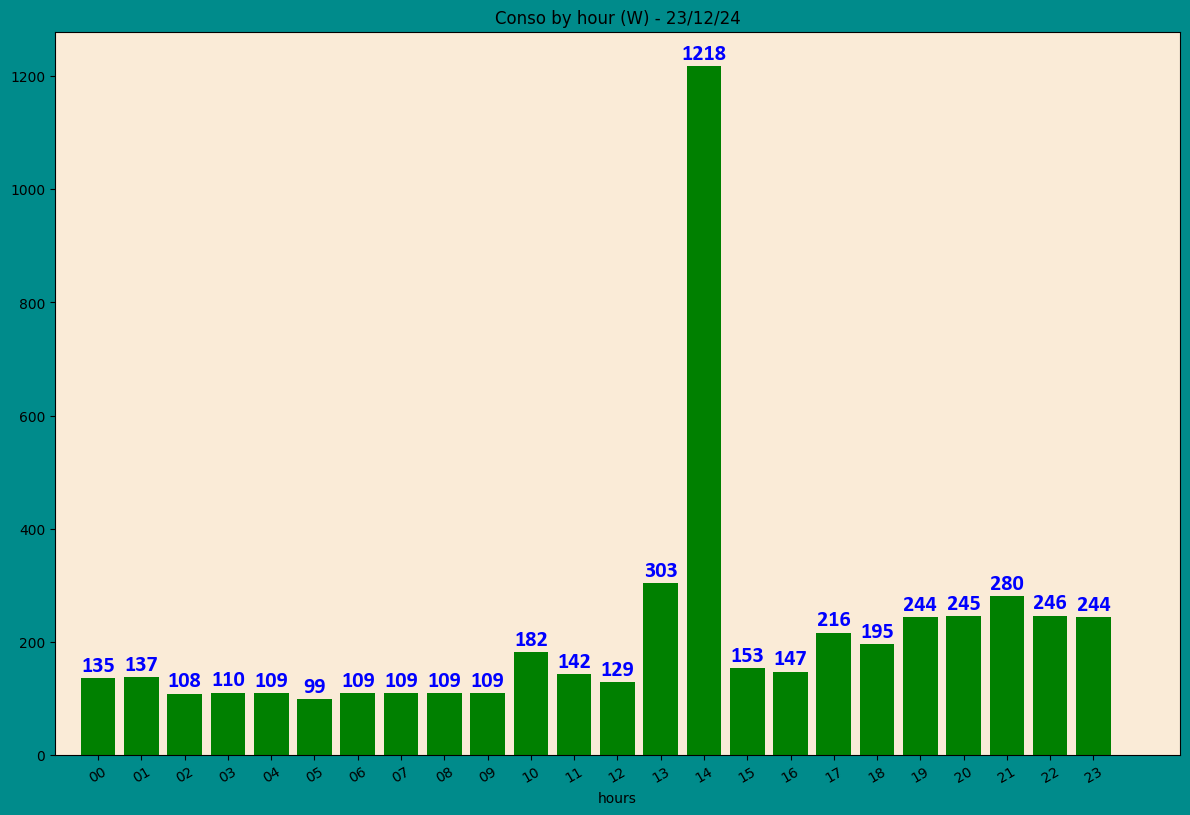

In [2657]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [2658]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 20     131     131    NaN   NaN
         21     279     410  148.0   NaN
         22     142     552 -137.0   NaN
         23     129     681  -13.0   NaN
22/08/23 00     130     130    NaN   NaN
...             ...     ...    ...   ...
02/01/25 06     109     811    9.0   7.0
         07     111     922    2.0   8.0
         08     110    1032   -1.0   9.0
         09     112    1144    2.0  10.0
         10     180    1324   68.0  11.0

[11991 rows x 4 columns]

In [2659]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,135,135,NaN,NaN
01,137,272,2.0,NaN
02,108,380,-29.0,NaN
03,110,490,2.0,NaN
04,109,599,-1.0,NaN
05,99,698,-10.0,NaN
06,109,807,10.0,NaN
07,109,916,0.0,NaN
08,109,1025,0.0,NaN


In [2660]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

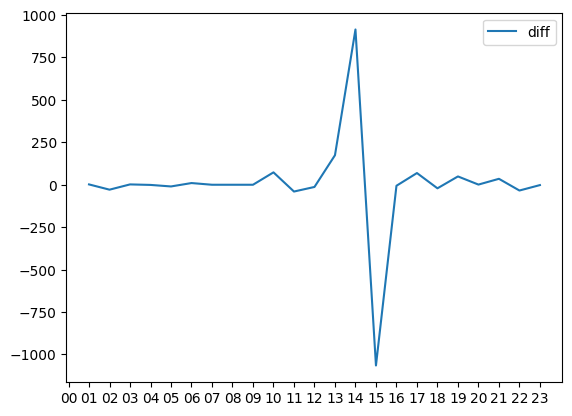

In [2661]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

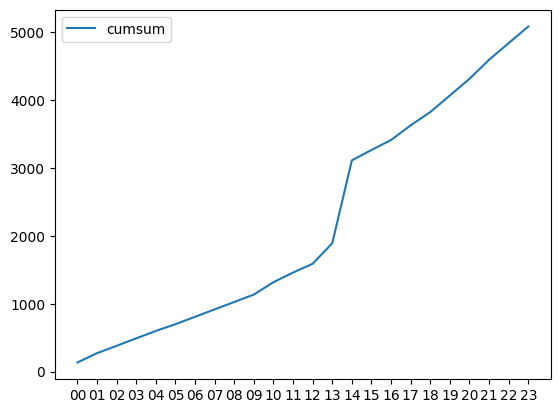

In [2662]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [2663]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB